In [5]:
# import algorithm modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
import datetime

In [6]:
# import preprocessing modules
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# load Avocado dataset
df = pd.read_csv(r"C:\Users\Jwpel\Documents\avocado.csv")

In [8]:
# inspection of dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.shape

(18249, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
# convert date column into date datatype
df['Date'] =  pd.to_datetime(df['Date'])

In [13]:
# create a month column from the date column, making month the variable
df['month'] = df['Date'].dt.month

In [14]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [15]:
# drop unecessary columns
X = df.drop(["Unnamed: 0","Date","AveragePrice","year"], axis=1)

In [16]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11


In [17]:
# assign dependent variable, average price
y = df["AveragePrice"]

In [18]:
# import scatterplot matrix
from pandas.plotting import scatter_matrix

In [19]:
# let's look at continuous variables scatterplot
df_num = df.select_dtypes(include=[np.float])

In [20]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAB4D93608>,
      dtype=object)

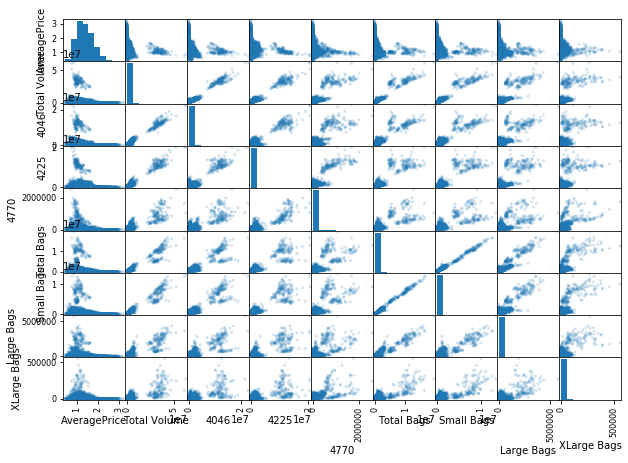

In [21]:
scatter_matrix(df_num, alpha = 0.2, figsize = (10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAB7620508>,
      dtype=object)

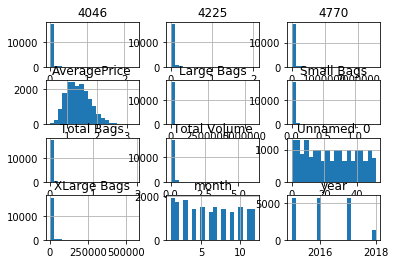

In [22]:
df.hist(bins = 20)

In [23]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11


In [24]:
# scale continuous variables to standard scale
X[["Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]] = StandardScaler().fit_transform(X[["Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]])

In [25]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,conventional,Albany,12
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,conventional,Albany,12
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,conventional,Albany,12
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,conventional,Albany,12
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,conventional,Albany,11


In [42]:
# One Hot Encode Categorical Variables
pd.get_dummies(X['type'], prefix='type')

,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
18244,0,1
18245,0,1
18246,0,1
18247,0,1


In [44]:
# concat new dummy variables to dataframe
X = pd.concat([X, pd.get_dummies(X['type'], prefix = 'type')], axis = 1)

In [45]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,type_conventional,type_organic
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,conventional,Albany,12,1,0
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,conventional,Albany,12,1,0
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,conventional,Albany,12,1,0
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,conventional,Albany,12,1,0
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,conventional,Albany,11,1,0


In [46]:
# One Hot Encode Region
pd.get_dummies(X['region'])

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
# concat new region dummies to dataframe
X = pd.concat([X, pd.get_dummies(X['region'])], axis = 1)

In [48]:
# create month dummy variables
pd.get_dummies(X['month'], prefix = 'Month')

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# concat month variables to dataframe
X = pd.concat([X, pd.get_dummies(X['month'], prefix = 'month')], axis = 1)
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,conventional,Albany,...,0,0,0,0,0,0,0,0,0,1
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,conventional,Albany,...,0,0,0,0,0,0,0,0,0,1
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,conventional,Albany,...,0,0,0,0,0,0,0,0,0,1
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,conventional,Albany,...,0,0,0,0,0,0,0,0,0,1
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,conventional,Albany,...,0,0,0,0,0,0,0,0,1,0


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total Volume         18249 non-null  float64
 1   4046                 18249 non-null  float64
 2   4225                 18249 non-null  float64
 3   4770                 18249 non-null  float64
 4   Total Bags           18249 non-null  float64
 5   Small Bags           18249 non-null  float64
 6   Large Bags           18249 non-null  float64
 7   XLarge Bags          18249 non-null  float64
 8   type                 18249 non-null  object 
 9   region               18249 non-null  object 
 10  month                18249 non-null  int64  
 11  type_conventional    18249 non-null  uint8  
 12  type_organic         18249 non-null  uint8  
 13  Albany               18249 non-null  uint8  
 14  Atlanta              18249 non-null  uint8  
 15  BaltimoreWashington  18249 non-null 

In [55]:
# now drop original categorical variables
X = X.drop(['type', 'month', 'region', 'month_month'], axis = 1)

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total Volume         18249 non-null  float64
 1   4046                 18249 non-null  float64
 2   4225                 18249 non-null  float64
 3   4770                 18249 non-null  float64
 4   Total Bags           18249 non-null  float64
 5   Small Bags           18249 non-null  float64
 6   Large Bags           18249 non-null  float64
 7   XLarge Bags          18249 non-null  float64
 8   type_conventional    18249 non-null  uint8  
 9   type_organic         18249 non-null  uint8  
 10  Albany               18249 non-null  uint8  
 11  Atlanta              18249 non-null  uint8  
 12  BaltimoreWashington  18249 non-null  uint8  
 13  Boise                18249 non-null  uint8  
 14  Boston               18249 non-null  uint8  
 15  BuffaloRochester     18249 non-null 

In [57]:
# create train/test split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .2, random_state = 9)

In [58]:
# assign linear regression variable
lr = linear_model.LinearRegression()

In [59]:
# train dataset with lr algorithm
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# prediction accuracy (R2 Score for training)
lr_train_acc = lr.predict(X_train)
print("Train Variance: %.2f" % r2_score(y_train, lr_train_acc))

Train Variance: 0.61


In [60]:
lr_pred = lr.predict(X_test)

In [62]:
# prediction accuracy for test set
print("Total Variance: %.2f" % r2_score(y_test, lr_pred))

Total Variance: 0.59


In [82]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Total Volume,8.735759e+01
4046,-3.200064e+01
4225,-3.048207e+01
4770,-2.724615e+00
Total Bags,-2.456899e+04
...,...
month_8,-4.864732e+07
month_9,-4.864732e+07
month_10,-4.864732e+07
month_11,-4.864732e+07


In [64]:
# assign Random Forest Regression variable
reg_rf = RandomForestRegressor(n_estimators = 1000, random_state = 9)

In [65]:
# train with rf
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=9, verbose=0, warm_start=False)

In [67]:
pred_rf = reg_rf.predict(X_test)

In [69]:
# prediction results on test set
print("Total Variance: %.2f" % r2_score(y_test, pred_rf))

Total Variance: 0.85
